# Get cocrystalized molecules from PDB

- Extract the cocrystalized molecules from the PDB structures.
- The active site is defined by a reference PDB structure and the name of the cocrystalized molecule (3-letter identifier code).

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import itertools
from pathlib import Path
from prody import parsePDB
import sys
sys.path.insert(0, '../..')
from helper_modules.get_cocristalized_ligands \
     import get_pocket_ligand, PocketResidues

- Load the table containing the PDBs metadata.

In [2]:
prot_name  = 'egfr'

In [3]:
path_df_file = glob(f"./TABLA_MTDATA_{prot_name.upper()}_*_crys.json")[0]
df_prot      = pd.read_json(path_df_file)
df_prot.index.name = 'PDB_ID'
df_prot.tail(3)

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,NumLigs,NameLigs
PDB_ID,,,,,,,,,,,,
6z4b,complex crystal structures of egfr with third-...,2020-11-11,1,A,2.5,0.952,19.752,3,"[699, 12, 260]","[[1, 699], [863, 874], [951, 1210]]",3,"[SO4, Q6K, 9LL]"
6z4d,complex crystal structures of egfr with third-...,2020-11-11,1,A,2.0,0.940,19.421,4,"[700, 2, 13, 260]","[[1, 700], [753, 754], [863, 875], [951, 1210]]",3,"[8BS, 57N, SO4]"
7a2a,complex crystal structures of egfr with third-...,2020-11-11,1,A,1.9,0.924,19.174,4,"[699, 2, 17, 260]","[[1, 699], [753, 754], [859, 875], [951, 1210]]",4,"[7G9, 57N, SO4, CL]"


- How many PDB entries have a cocristalized molecule?

In [4]:
df_prot_ligs = df_prot[df_prot.NumLigs > 0]
print(F'{len(df_prot_ligs)} of {len(df_prot)} structures have at least one HETATM molecule.')

158 of 175 structures have at least one HETATM molecule.


- How many different small molecules (HETAMT) are there?

In [5]:
# How many cocrystalized molecules are there?
# A set of all HETATM molecules
lig_full_list = list( itertools.chain.from_iterable( df_prot.NameLigs ) )
print(f'There are a total of {len(lig_full_list)}', 
       'HETATM molecules (duplicates included).')

lig_all_list = list(set(lig_full_list))
print(f'There are {len(lig_all_list)} unique', 
       'HETATM molecules (without duplicates).')

There are a total of 283 HETATM molecules (duplicates included).
There are 120 unique HETATM molecules (without duplicates).


### Visualize the pocket residues
<h4 style='color: black; background-color: #F9E5AB; padding: 5px;'>
    Important!
</h4>

<mark>NOTE:</mark> Only for the EGFR, we choose the PDB [7a2a](https://www.rcsb.org/structure/7A2A) as the reference structure, which has two bound molecules inside its active site. This allow us to have a better definition of the residues belonging to the active site.

In [6]:
# Use a reference structure to visualize the pocket residues
ref_struc_id      = '7a2a'
ref_ligand_name_1 = '57N'
ref_ligand_name_2 = '7G9'

In [7]:
# Only for EGFR, two molecules will be used as reference
pkt_info_1 = PocketResidues(ref_struc_id, ref_ligand_name_1)
pkt_info_2 = PocketResidues(ref_struc_id, ref_ligand_name_2)

pocket_residues_str_1 = pkt_info_1.get_pocket_residues_as_list().split(' ')
pocket_residues_str_2 = pkt_info_2.get_pocket_residues_as_list()
pocket_residues_str_2 = pocket_residues_str_2.split(' ')

# Merge the values
pocket_residues_str = sorted(list(set(pocket_residues_str_1 + pocket_residues_str_2)))
pocket_residues_str = ' '.join(pocket_residues_str)

print('Indices of pocket redsidues:', pocket_residues_str)

Indices of pocket redsidues: 717 718 719 720 723 725 726 727 728 738 742 743 744 745 746 747 758 759 760 761 762 763 764 766 767 769 774 775 776 777 778 779 780 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801 803 840 841 842 843 844 845 853 854 855 856 857 858


In [8]:
view = pkt_info_2.visualize_pocket()
view

NGLWidget()

In [11]:
view.render_image()

Image(value=b'', width='99%')

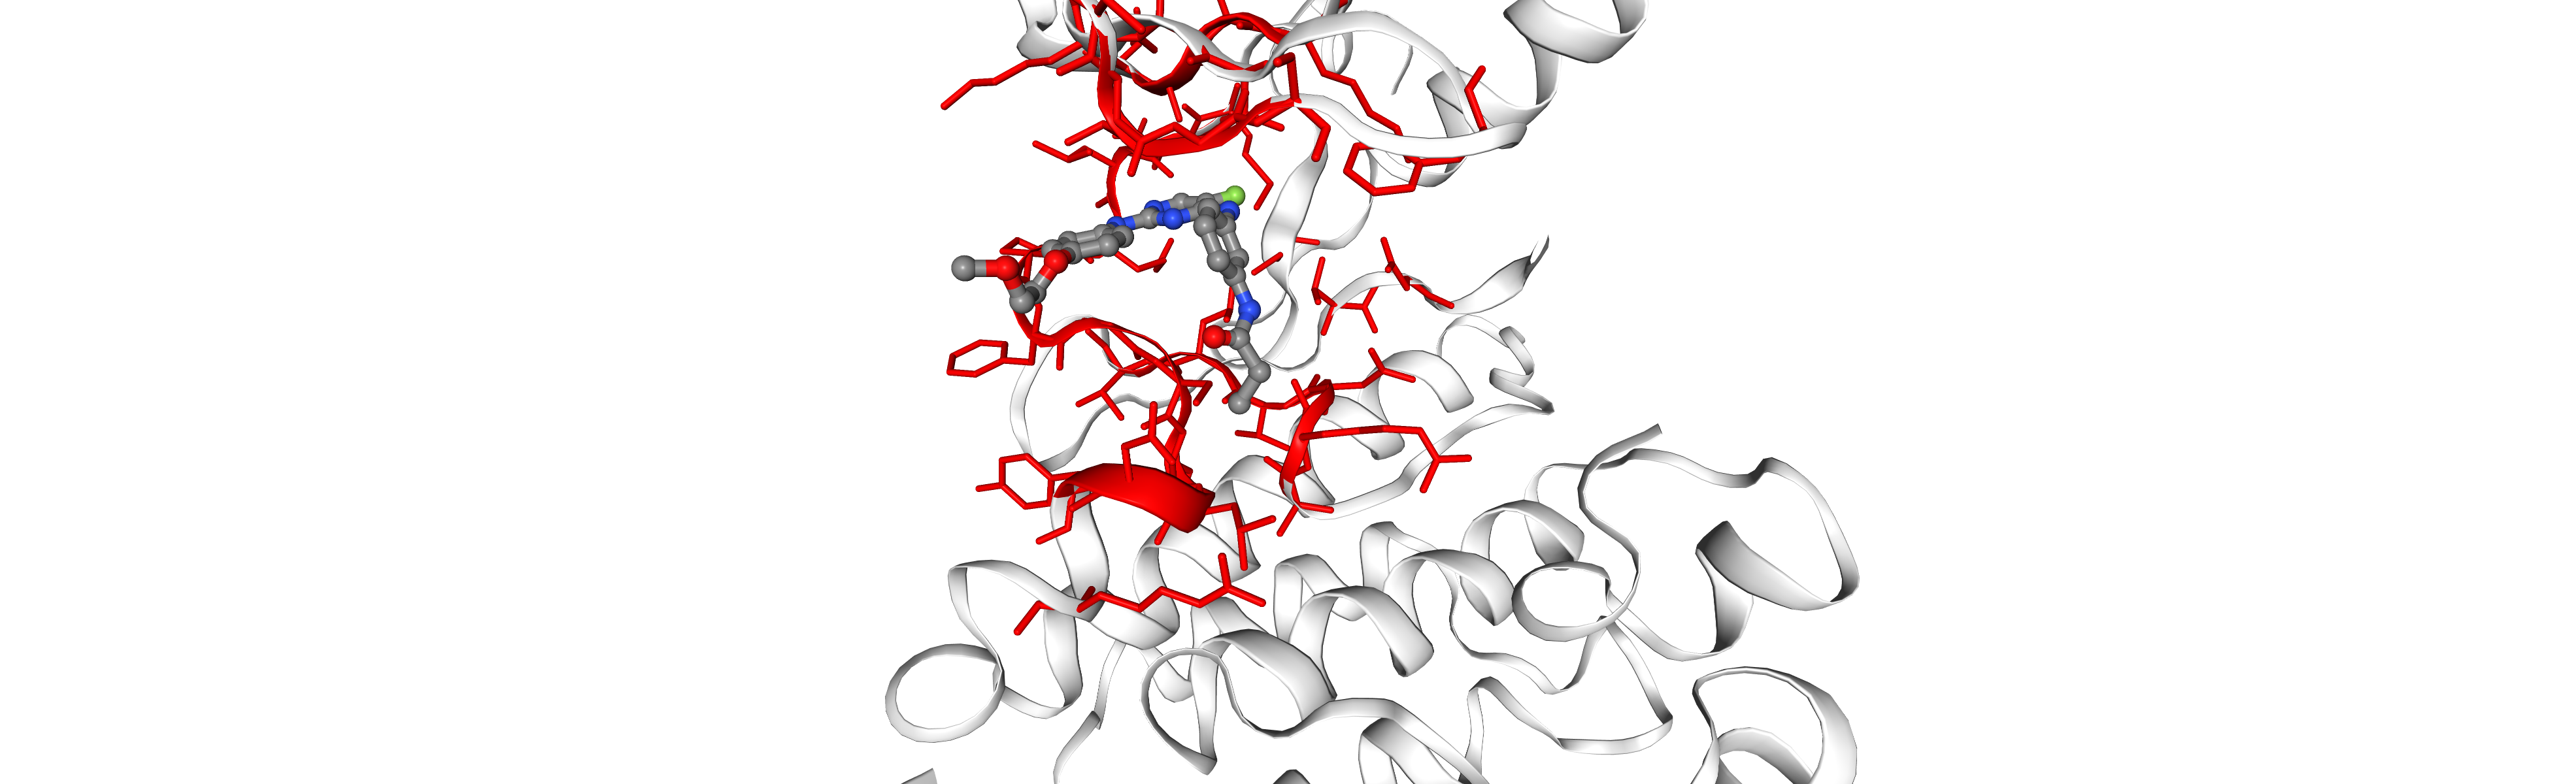

In [13]:
view._display_image()

## Carry out the Analysis
- Define the input files and the output directory.

<h4 style='color: black; background-color: #F9E5AB; padding: 5px;'>
    Important!
</h4>
For the EGFR, the residue numbering starts at 0 which corresponds to the 710 position in the original protein sequence.

In [11]:
# For this protein the residue numbering was
new_positions_in_prep_files = [str(int(i) - 710) for i in pocket_residues_str.split(' ')]
print('Before\n', pocket_residues_str)
pocket_residues_str = ' '.join(new_positions_in_prep_files)
print('After\n', pocket_residues_str)

Before
 717 718 719 720 723 725 726 727 728 738 742 743 744 745 746 747 758 759 760 761 762 763 764 766 767 769 774 775 776 777 778 779 780 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801 803 840 841 842 843 844 845 853 854 855 856 857 858
After
 7 8 9 10 13 15 16 17 18 28 32 33 34 35 36 37 48 49 50 51 52 53 54 56 57 59 64 65 66 67 68 69 70 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 93 130 131 132 133 134 135 143 144 145 146 147 148


In [12]:
# Define the output directories
OUT_MAIN          = './pdb_structures'
IN_DIR_ENSEMBLE   = f'{OUT_MAIN}/pdb_prepared'
IN_DIR_RAW_LIGS   = f'{OUT_MAIN}/raw_ligands'
OUT_DIR_PREP_LIGS = f'{OUT_MAIN}/pocket_ligands'

# Create the output directory if it doesnt exists
Path(OUT_DIR_PREP_LIGS).mkdir(parents = True, exist_ok = True)

- Update the main Dataframe with ligands information
 - Inhib: Name of the molecule found inside the pocket.
 - Inhib_mass: Molecular weight of the found molecule.
Save the updated dataframe:

In [13]:
# We will add two new columns to the dataframe
df_prot["Inhib"] = ""
df_prot["Inhib_mass"] = np.nan

# Get all pocket ligands
for pdb_id in df_prot.index:
    inhibidor = get_pocket_ligand(
                        pdb_id = pdb_id, 
                        pocket_residues = pocket_residues_str,
                        raw_lig_dir     = IN_DIR_RAW_LIGS,
                        prot_chain_dir  = IN_DIR_ENSEMBLE,
                        pk_ligs_dir = OUT_DIR_PREP_LIGS,
                        write_files = True, 
                        cutoff      = 8,
                        min_weight  = 97
                 )

    df_prot.at[str(pdb_id), 'Inhib'] = inhibidor[0]
    df_prot.at[pdb_id, 'Inhib_mass'] = inhibidor[1]
print('...')

The model 1m14 HAS NO LIGAND inside the pocket.
Protein 1m17:
   Molecules found: ['AQ4' 'HOH'] -> ligand AQ4 saved.
Protein 1xkk:
   Molecules found: ['FMM' 'HOH' 'PO4'] -> ligand FMM saved.
The model 2eb2 HAS NO LIGAND inside the pocket.
Protein 2eb3:
   Molecules found: ['ANP'] -> ligand ANP saved.
The model 2gs2 HAS NO LIGAND inside the pocket.
Protein 2gs6:
   Molecules found: ['112' 'CL' 'HOH'] -> ligand 112 saved.
Protein 2gs7:
   Molecules found: ['ANP' 'HOH' 'IOD' 'MG'] -> ligand ANP saved.
Protein 2itn:
   Molecules found: ['ANP' 'HOH' 'MG'] -> ligand ANP saved.
Protein 2ito:
   Molecules found: ['HOH' 'IRE'] -> ligand IRE saved.
Protein 2itp:
   Molecules found: ['AEE' 'HOH'] -> ligand AEE saved.
Protein 2itq:
   Molecules found: ['HOH' 'ITQ'] -> ligand ITQ saved.
Protein 2itt:
   Molecules found: ['AEE' 'HOH'] -> ligand AEE saved.
Protein 2itu:
   Molecules found: ['HOH' 'ITQ'] -> ligand ITQ saved.
Protein 2itv:
   Molecules found: ['ANP' 'HOH'] -> ligand ANP saved.
Protein

### Updated Dataframe

In [14]:
n = df_prot.shape[0]
file = f'TABLA_MTDATA_{prot_name.upper()}_{n}_crys_LIGS_INFO.json'
if Path(file).exists():
    df_prot = pd.read_json(file)
else:
    df_prot.to_json(file)
df_prot.head()

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,NumLigs,NameLigs,Inhib,Inhib_mass
PDB_ID,,,,,,,,,,,,,,
1m14,structure of the epidermal growth factor \nrec...,2002-09-04,1,A,2.60,1.000,23.058,2,"[695, 236]","[[1, 695], [975, 1210]]",0,[],None,NaN
1m17,structure of the epidermal growth factor \nrec...,2002-09-04,1,A,2.60,1.000,23.058,2,"[695, 236]","[[1, 695], [975, 1210]]",1,[AQ4],AQ4,370.253100
1xkk,a unique structure for epidermal growth factor...,2004-12-07,1,A,2.40,0.936,19.256,5,"[701, 4, 4, 8, 260]","[[1, 701], [734, 737], [750, 753], [867, 874],...",2,"[FMM, PO4]",FMM,554.851103
2eb2,structural basis for the altered drug sensitiv...,2008-02-12,1,A,2.50,0.980,20.661,5,"[695, 3, 1, 1, 260]","[[1, 695], [721, 723], [749, 749], [866, 866],...",0,[],None,NaN
2eb3,structural basis for the altered drug sensitiv...,2008-02-12,1,A,2.84,0.941,19.835,4,"[695, 1, 14, 260]","[[1, 695], [721, 721], [862, 875], [951, 1210]]",1,[ANP],ANP,489.061283
